In [1]:
import os
import sys
import numpy as np
import time
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib
import matplotlib.pyplot as plt 

plt.style.use('~/evanstyle.mplstyle')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

## Dictionary of datasets on LLNL. Checks if they exist and how many files
### Note, the integer index of this dictionary matches the row number in the google-spreadsheet log
##### https://docs.google.com/spreadsheets/d/14KmVPS824ExjVpss9H6fMSNVhopGtHVclZNsw5kKLr8/edit?usp=sharing
##### Save this sheet to your own drive!

In [2]:
datatopdir_r1 = "/p/lustre1/angelico/hv-test-chamber/Run1/"
datasets_r1 = {2:"1-29-21/pmt-trig-filling-1800/", \
                3:"1-29-21/pmt-trig-filling-1920/",\
                4:"1-30-21/anode-crosstrig-1300/",\
                6:"1-30-21/ignition-1500/",\
                7:"1-30-21/ignition-10k-1520/",\
                8:"1-31-21/glitch-1520/",\
                9:"2-1-21/anode-100/",\
                10:"2-1-21/anode-1340/",\
                11:"2-1-21/glitch-1530/",\
                12:"2-1-21/glitch-2230/",\
                13:"2-2-21/anode-1030/",\
                14:"2-2-21/corona-1300/",\
                15:"2-2-21/glitch-1320/",\
                16:"2-2-21/glitch-1430/",\
                17:"2-2-21/anode-1720/",\
                18:"2-3-21/glitch-1040/",\
                19:"2-3-21/anode-1050/",\
                20:"2-3-21/glitch-1810/",\
                21:"2-3-21/anode-1820/"}

#check that the datasets are indexible
print("Checking for datasets in top directory: " + datatopdir_r1)
to_remove = [] #list of keys to remove due to not existing
for dno in datasets_r1:
    print(str(dno)+": " + datasets_r1[dno] + "\t\t", end = '')
    isdir = os.path.isdir(datatopdir_r1+datasets_r1[dno]+"/")
    if(isdir):
        numfiles = len([_ for _ in os.listdir(datatopdir_r1+datasets_r1[dno]+"/")])
        print("True, with " + str(numfiles) + " files", end= ' ')
        #check whether the reduced/raw directories exist
        red_dir = datatopdir_r1+datasets_r1[dno]+"/"+"reduced/"
        raw_dir = datatopdir_r1+datasets_r1[dno]+"/"+"rawhdf/"
        if(os.path.isdir(red_dir)):
            #event number processed is in the filename, get the highest one. 
            redfiles = [_ for _ in os.listdir(red_dir)]
            red_evtnum = [int(_.split('.')[0]) for _ in redfiles]
            if(len(red_evtnum) != 0):
                print(", has " + str(max(red_evtnum)) + " events reduced", end= ' ')
        if(os.path.isdir(raw_dir)):
            rawfiles = [_ for _ in os.listdir(raw_dir)]
            raw_evtnum = [int(_.split('.')[0]) for _ in rawfiles]
            if(len(raw_evtnum) != 0):
                print(", has " + str(max(raw_evtnum)) + " events raw", end= ' ')
        print("\n", end=' ')
    else:
        print("False")
        to_remove.append(dno)
        

for k in to_remove:
    del datasets_r1[k]
    

datatopdir_r2 = "/p/lustre1/angelico/hv-test-chamber/Run2/"
datasets_r2 = {26:"2-22-2021/cosmics-1800/",\
              27:"2-23-2021/glitch-1150/",\
              28:"2-23-2021/anode-1240/",\
              29:"2-23-2021/pmts-1240/",\
              30:"2-23-2021/cosmics-1430/",\
              31:"2-23-2021/glitch-2000/",\
              32:"2-24-2021/glitch-1140/",\
              33:"2-24-2021/glitch-1215/",\
              34:"2-24-2021/glitch-1425/",\
              35:"2-24-2021/anode-1730/",\
              36:"2-25-2021/anode-1030/",\
              37:"2-26-2021/anode-1430/"}

#check that the datasets are indexible
print("Checking for datasets in top directory: " + datatopdir_r2)
to_remove = [] #list of keys to remove due to not existing
for dno in datasets_r2:
    print(str(dno)+": " + datasets_r2[dno] + "\t\t", end = '')
    isdir = os.path.isdir(datatopdir_r2+datasets_r2[dno]+"/")
    if(isdir):
        numfiles = len([_ for _ in os.listdir(datatopdir_r2+datasets_r2[dno]+"/")])
        print("True, with " + str(numfiles) + " files", end= ' ')
        #check whether the reduced/raw directories exist
        red_dir = datatopdir_r2+datasets_r2[dno]+"/"+"reduced/"
        raw_dir = datatopdir_r2+datasets_r2[dno]+"/"+"rawhdr/"
        if(os.path.isdir(red_dir)):
            #event number processed is in the filename, get the highest one. 
            redfiles = [_ for _ in os.listdir(red_dir)]
            red_evtnum = [int(_.split('.')[0]) for _ in redfiles]
            if(len(red_evtnum) != 0):
                print(", has " + str(max(red_evtnum)) + " events reduced", end= ' ')
        if(os.path.isdir(raw_dir)):
            rawfiles = [_ for _ in os.listdir(raw_dir)]
            raw_evtnum = [int(_.split('.')[0]) for _ in rawfiles]
            if(len(raw_evtnum) != 0):
                print(", has " + str(max(raw_evtnum)) + " events raw", end= ' ')
        print("\n", end=' ')
    else:
        print("False")
        to_remove.append(dno)
        

for k in to_remove:
    del datasets_r2[k]
    

Checking for datasets in top directory: /p/lustre1/angelico/hv-test-chamber/Run1/
2: 1-29-21/pmt-trig-filling-1800/		True, with 3021 files , has 2653 events reduced , has 2653 events raw 
 3: 1-29-21/pmt-trig-filling-1920/		True, with 81720 files , has 9982 events reduced , has 9982 events raw 
 4: 1-30-21/anode-crosstrig-1300/		True, with 163 files , has 80 events reduced , has 80 events raw 
 6: 1-30-21/ignition-1500/		True, with 3797 files , has 1976 events reduced , has 1976 events raw 
 7: 1-30-21/ignition-10k-1520/		True, with 10851 files , has 5799 events reduced , has 5799 events raw 
 8: 1-31-21/glitch-1520/		True, with 10400 files , has 5204 events reduced , has 5204 events raw 
 9: 2-1-21/anode-100/		True, with 15630 files , has 7847 events reduced , has 7847 events raw 
 10: 2-1-21/anode-1340/		True, with 210 files , has 104 events reduced , has 104 events raw 
 11: 2-1-21/glitch-1530/		True, with 5335 files , has 2674 events reduced , has 2674 events raw 
 12: 2-1-21/glitc

## Utility functions for parsing file names

In [3]:

def parse_timestamp_from_filename(infile):
    #infile looks like /path/to/data/file/pmt15.23.43.132.csv (hour, minute, second, milli)
    t = infile.split('/')[-1].split('.')[:-1]
    t[0] = t[0][-2:] #hour is always only two digits, this line just ignores file prefix 
    t = [int(_) for _ in t]
    #now is in form [hours, minutes, seconds, millis]
    milliseconds = t[3] + 1e3*t[2] + 1e3*60*t[1] + 1e3*60*60*t[0]
    return milliseconds

#looks at the input directory (a dataset) and
#finds all .csv files, separating them by file prefix
def get_separated_file_lists(indir, file_prefixes, nevents=None):
    #full list of .csv files
    file_list = []
    if(nevents is not None):
        for i, f in enumerate(os.listdir(indir)):
            if(i > nevents):
                break
            if(os.path.isfile(os.path.join(indir, f)) \
                 and f.endswith('.csv')):
                file_list.append(f)
    else:
        file_list = [f for f in os.listdir(indir) if os.path.isfile(os.path.join(indir, f)) \
                 and f.endswith('.csv')]
    
    separate_file_lists = {}
    for pref in file_prefixes:
        #selects filenames by prefix. so separate_file_lists['pmt'] = ['pmt14.53.24.449', 'pmt10.34....', ...]
        separate_file_lists[pref] = list(filter(lambda x: x[:len(pref)] == pref, file_list))  
    
    return separate_file_lists

#converts the dictionary of separated file lists into
#a dictionary of separated timestamps (units milliseconds)
def get_separated_timestamps(separated_file_lists):
    separated_timestamps = {}
    for pref in separated_file_lists:
        separated_timestamps[pref] = [parse_timestamp_from_filename(f) for f\
                                      in separated_file_lists[pref]]
       
        #sort both the timestamps lists and the filelists
        #simultaneously by the timestamps
        separated_timestamps[pref], separated_file_lists[pref] = \
        (list(t) for t in zip(*sorted(zip(separated_timestamps[pref], separated_file_lists[pref]))))
    
    return separated_timestamps, separated_file_lists

def get_sampling_period_from_file(infile):
    #parse header for the timestep
    f = open(infile, 'r', errors='ignore')
    ls = f.readlines()
    raw_sample_rate = ls[4]
    raw_sample_rate = raw_sample_rate.split(' ')[-1]
    raw_sample_rate = float(raw_sample_rate.split('H')[0])
    return (1.0/raw_sample_rate)*1e9 #nanoseconds


In [4]:
from datetime import datetime

#this function zeroes a list of timestamps based on
#(1) the "global reference", i.e. some date and time
#and (2) a date for the conversion from file timestamp 

#TRICKY PART: only flagged by "daychange = True".
#because there is often an interface
#between 23:59 and 00:00, this usually indicates
#an increment in the day, rather than 00:00 coming
#before 23:59. We will call 6am the cutoff, where 
#any time before 10am is assumed to be the next day
#(this needs to be changed if someone starts a new
#dataset before 10am)
#global_reference and date_of_data are assumed to be datetime.datetime objects
def convert_timestamps_to_realtime(separated_timestamps, global_reference, date_of_data, daychange = True):
    this_dataset_zero_time = (date_of_data - global_reference).total_seconds() * 1000.0 #milliseconds
    one_day = 24*60*60*1000 #in milliseconds, one day, for doing daychange math
    daychange_time = 10*60*60*1000 #10:00 am in milliseconds
    sep_times_h, sep_times_m, sep_times_s = {}, {}, {}
    for pref in separated_timestamps:
        stamps = np.array(separated_timestamps[pref])
        adjusted_stamps = []
        if(daychange):
            for time in stamps:
                if(time < daychange_time):
                    adjusted_stamps.append(time + one_day)
                else:
                    adjusted_stamps.append(time)
        else:
            adjusted_stamps = stamps
        zeroed = np.array(adjusted_stamps) + this_dataset_zero_time #numpy array fast math
        sep_times_h[pref] = zeroed/(1000*60*60.0)
        sep_times_m[pref] = zeroed/(1000*60.0)
        sep_times_s[pref] = zeroed/(1000.0)
        
    return sep_times_h, sep_times_m, sep_times_s
    
    

## Demonstrate plotting a single datasets timestamps relative to the start of the entire run

In [8]:
#the part of the filename before the timestamp. 
#used to distinguish the two oscilloscopes
file_prefixes = ["pmt", "anode"]


#load some timestamps from a dataset of your choosing
dataset = datasets_r1[7]
topdir = datatopdir_r1
t0 = time.time()
nevents = 500
separated_file_lists = get_separated_file_lists(topdir+dataset, file_prefixes, nevents)
separated_timestamps, separated_file_lists = get_separated_timestamps(separated_file_lists)

#print timing
print("Took " + str(time.time() - t0) + " seconds to load ", end=' ')
for pref in separated_timestamps:
    print(str(len(separated_timestamps[pref])) + " " + pref + " files,", end=' ')
print("\n")
#end print timing

Took 19.091232299804688 seconds to load  221 pmt files, 280 anode files, 



In [9]:
#convert to hours, mins, seconds since the run started
dataset_date = datetime.strptime(dataset.split('/')[0], "%m-%d-%y")
#run_reference = datetime.strptime("2-1-21 22:00:00", "%m-%d-%y %H:%M:%S")
run_reference = dataset_date
#this one you need to be careful and know info on the dataset, 
#see comment by "convert_timestamps_to_realtime"
daychange = True
sep_times_h, sep_times_m, sep_times_s = convert_timestamps_to_realtime(separated_timestamps, run_reference, dataset_date, daychange)

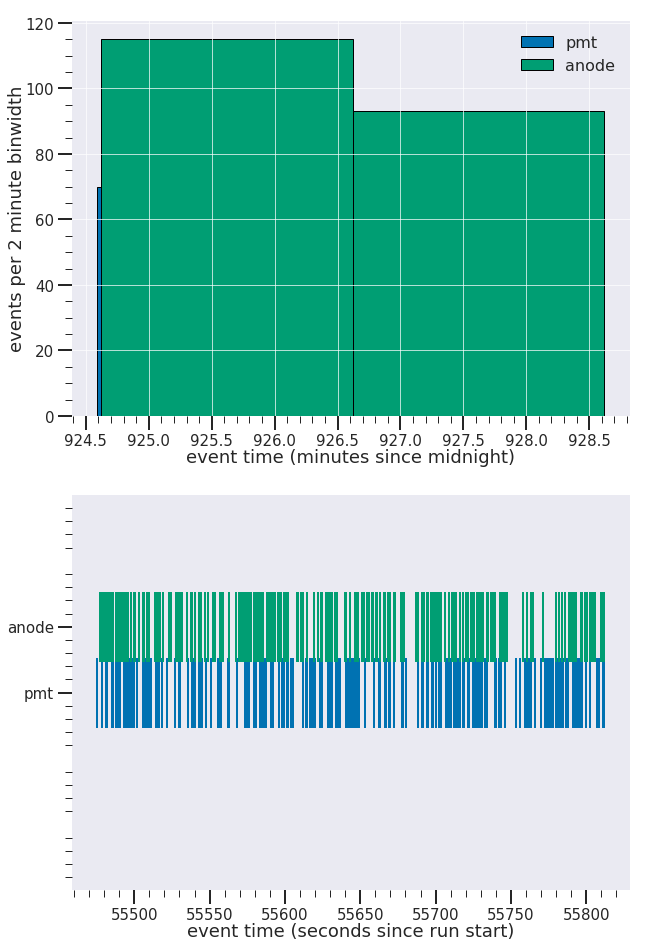

In [10]:
#makes a histogram of event times, binned to see "differential" rate.
#also makes a funny upsidedown, infinitessimal histogram to compare times across pmt/anode
fig, (axhist, axscat) = plt.subplots(nrows = 2, figsize=(10, 16))
binwidth = 2 #minutes

yticks = [0, 1]
pref_vals = file_prefixes
for i, pref in enumerate(file_prefixes):
    bins = np.arange(min(sep_times_m[pref]), max(sep_times_m[pref]), binwidth)
    axhist.hist(sep_times_m[pref], bins, label=pref)
    
    axscat.scatter(np.array(sep_times_s[pref]), [yticks[i]]*len(sep_times_s[pref]),  marker='|', s=5000)


axscat.set_xlabel("event time (seconds since run start)")
axhist.set_xlabel("event time (minutes since midnight)")
axhist.set_ylabel("events per " + str(binwidth) + " minute binwidth")
#for funny plot
axscat.set_ylim([-3, 3])
axscat.set_yticks(yticks)
axscat.set_yticklabels(pref_vals)
axscat.grid(False)

axhist.legend()

plt.show()

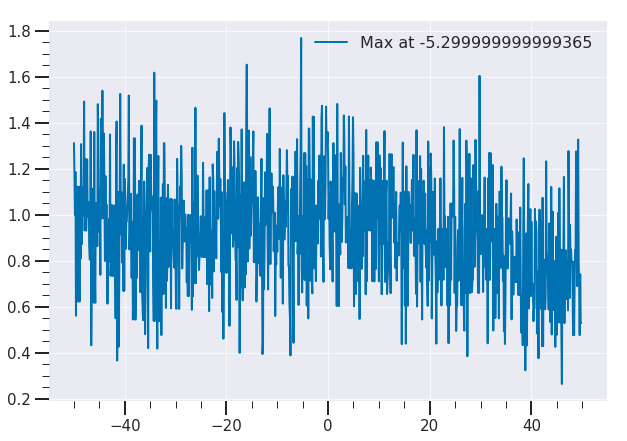

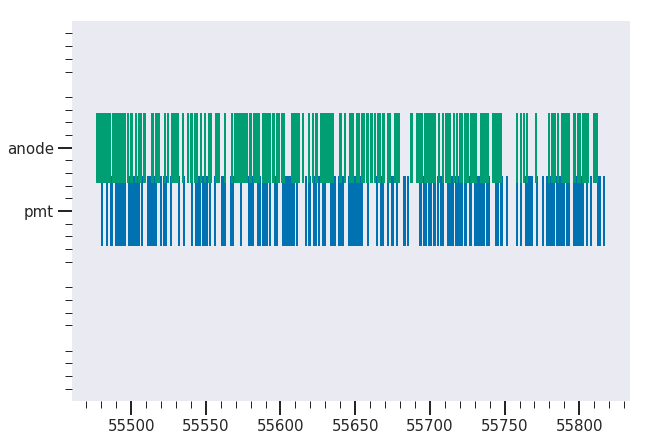

In [11]:
#correlation of timestamps
import pycorrelate

corr_dt = .1 #seconds to bin the time-lag correlation
corr_bins = np.arange(-50, 50, corr_dt)
corr = pycorrelate.pycorrelate.pcorrelate(sep_times_s['pmt'], sep_times_s['anode'], corr_bins, normalize=True)
shift = corr_bins[np.argmax(corr)]
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(corr_bins[:-1], corr, label="Max at " + str(shift))
ax.legend()
plt.show()


pmt_sep_times_s_shifted = sep_times_s['pmt'] - shift
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(np.array(pmt_sep_times_s_shifted), [yticks[0]]*len(pmt_sep_times_s_shifted),  marker='|', s=5000)
ax.scatter(np.array(sep_times_s['anode']), [yticks[1]]*len(sep_times_s['anode']),  marker='|', s=5000)
ax.set_ylim([-3, 3])
ax.set_yticks(yticks)
ax.set_yticklabels(pref_vals)
ax.grid(False)
plt.show()